In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import loading
import creating_table
import analyzing
import modeling

/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/sia_master/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# URLs with correct format: raw from GitHub
url_energy = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
url_country = "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"

energy = loading.load_data(url_energy)
country = loading.load_data(url_country)

main_df = creating_table.main_table(energy_df = energy, country_df = country)

In [2]:
describe_table = analyzing.describe(main_df)
describe_table

/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/analyzing.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  descriptive_table = pd.concat([descriptive_table, new_data], ignore_index=True)


,Variable,Unit,Min,Max,Mean,Median,SD
0,gdp_per_capita,USD - 2011 prices,438.61,164146.40,16336.75,10088.85,17922.48
1,fossil_elec_per_capita,kilowatt-hours per person,0.00,24133.34,2186.62,930.29,3282.49
2,low_carbon_elec_per_capita,kilowatt-hours per person,0.00,56030.78,1616.93,250.28,4674.23


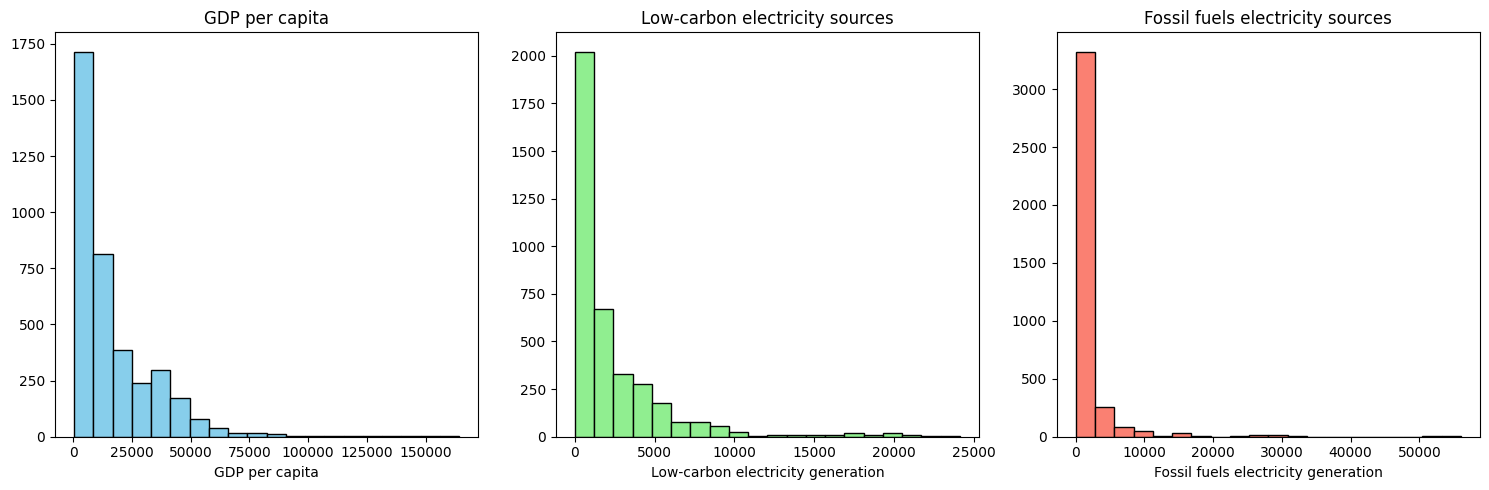

In [4]:
analyzing.plot_histograms(main_df)

/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/sia_master/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/sia_master/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


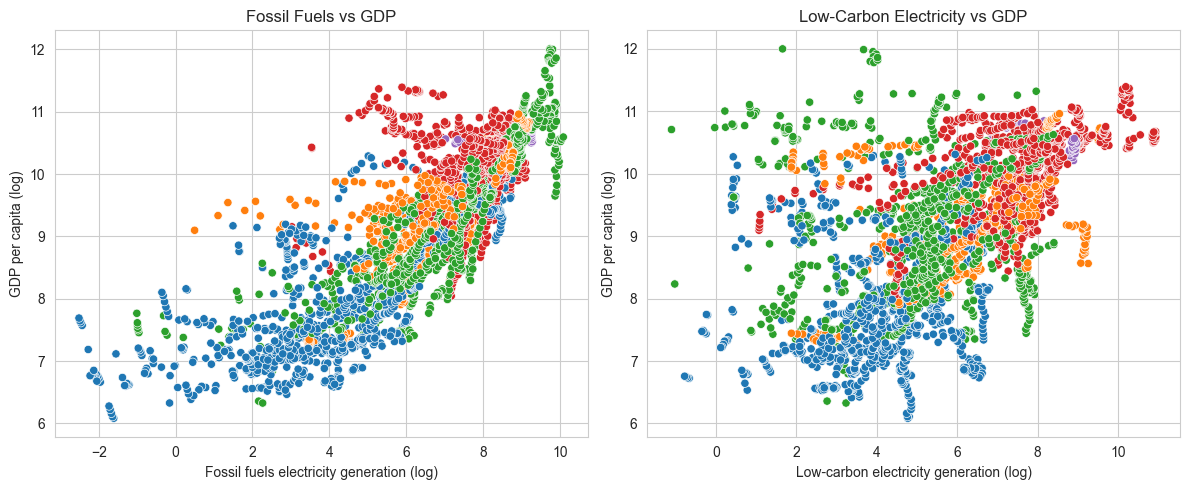

In [3]:
analyzing.plot_scatterplots(main_df)

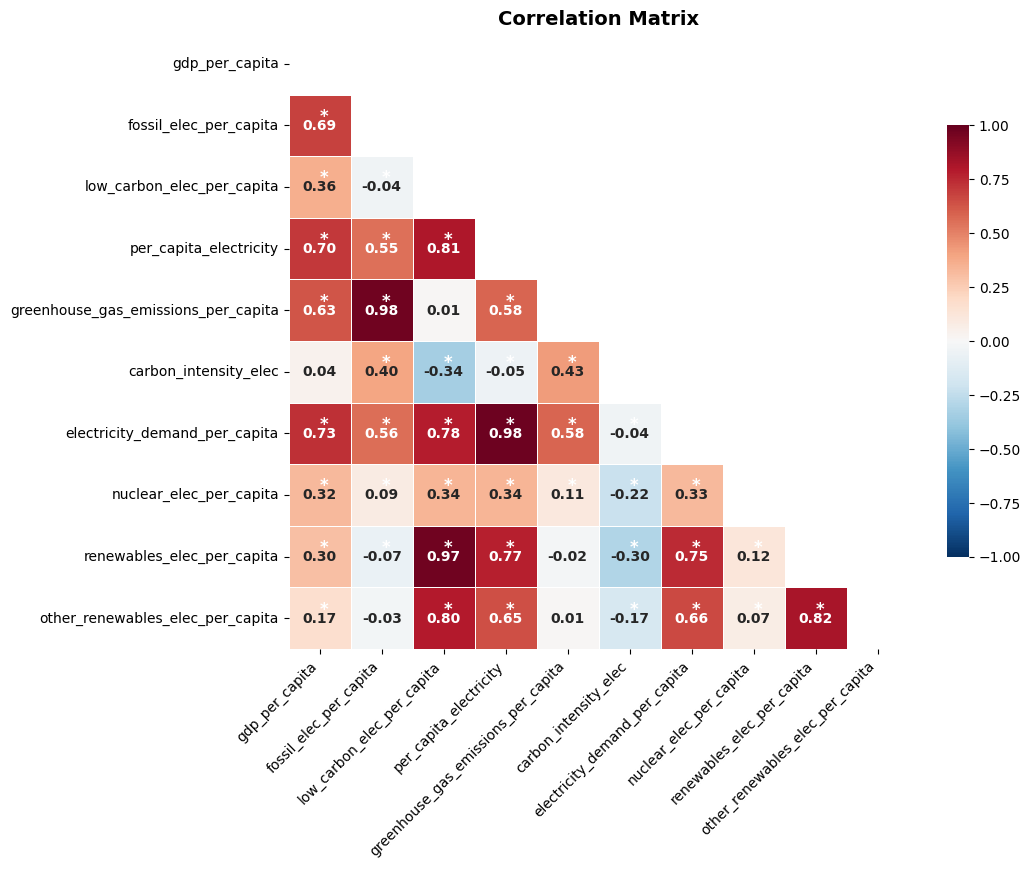

In [2]:
analyzing.correlation_matrix(main_df)

In [6]:
modeling.regression_models(main_df)



Regression Results - Pooled vs Fixed Effects models
                               Pooled OLS             FE Country  \
log_lowcarbon_elec  0.5307 (0.0107) [***]  0.0835 (0.0042) [***]   
log_fossil_elec     0.9289 (0.0094) [***]  0.0777 (0.0055) [***]   

                                  FE Year  
log_lowcarbon_elec  0.1541 (0.0044) [***]  
log_fossil_elec     0.3512 (0.0047) [***]  


/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/sia_master/lib/python3.9/site-packages/linearmodels/panel/data.py:680: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mu = self._frame.groupby(level=level).mean()
/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/sia_master/lib/python3.9/site-packages/linearmodels/panel/data.py:680: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mu = self._frame.groupby(level=level).mean()
/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/sia_master/li